#### 1.Problem indentification:
##### salary prediction

#### 2.Import dataset:

In [1]:
import pandas as pd
company_data=pd.read_csv(r"dynamic_salary_benchmark_dataset.csv")

#### 3.Data understanding:

##### 3.1 Basic data understanging:

In [2]:
company_data.head()

,Employee_ID,Job_Role,Experience_Years,Location,Industry,Skills,Education,Company_Size,Salary_LPA
0,1,Data Engineer,0,Pune,Healthcare,"Tableau,Power BI",M.Tech,Medium,7.00
1,2,Senior Data Analyst,2,Bangalore,Finance,"Excel,C++,Tableau,AWS",M.Sc,Small,8.56
2,3,Data Analyst,5,Pune,E-commerce,"Excel,Docker",MBA,Large,5.96
3,4,AI Engineer,11,Kolkata,Healthcare,"R,Tableau",M.Sc,Large,12.37
4,5,Marketing Manager,11,Delhi,Finance,"AWS,GCP",PhD,Small,17.91


In [3]:
company_data.shape

(10200, 9)

In [4]:
company_data.describe()

,Employee_ID,Experience_Years,Salary_LPA
count,10200.000000,10200.000000,10200.000000
mean,5100.500000,7.480392,12.967943
std,2944.630707,4.630986,5.553612
min,1.000000,0.000000,3.000000
25%,2550.750000,3.000000,8.677500
50%,5100.500000,7.000000,12.280000
75%,7650.250000,12.000000,16.662500
max,10200.000000,15.000000,30.170000


In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_ID       10200 non-null  int64  
 1   Job_Role          10200 non-null  object 
 2   Experience_Years  10200 non-null  int64  
 3   Location          10200 non-null  object 
 4   Industry          10200 non-null  object 
 5   Skills            10200 non-null  object 
 6   Education         10200 non-null  object 
 7   Company_Size      10200 non-null  object 
 8   Salary_LPA        10200 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 717.3+ KB


In [6]:
company_data.drop(columns=["Employee_ID"], inplace=True)


In [7]:
#numercal data:
num_data=company_data.select_dtypes(include=["int","float"]).columns

#categorical data:
cat_data=company_data.select_dtypes(include=("object")).columns

print(num_data)
print("="*100)
print(cat_data)

Index(['Experience_Years', 'Salary_LPA'], dtype='object')
Index(['Job_Role', 'Location', 'Industry', 'Skills', 'Education',
       'Company_Size'],
      dtype='object')


##### 3.2 Check data missing values: 

In [8]:
company_data.isnull().sum()

Job_Role            0
Experience_Years    0
Location            0
Industry            0
Skills              0
Education           0
Company_Size        0
Salary_LPA          0
dtype: int64

##### 3.3 Data distribution:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

##### 3.3.1 Numerical data distribution:

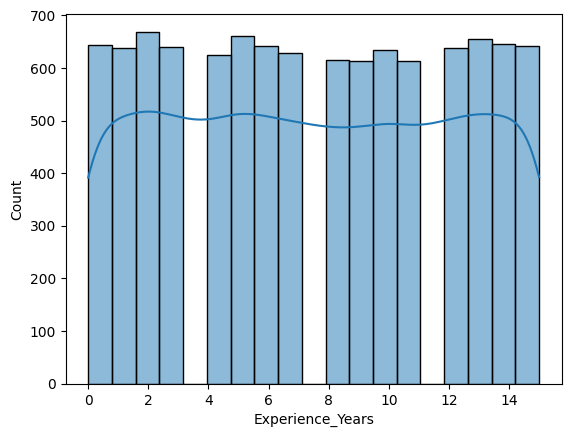

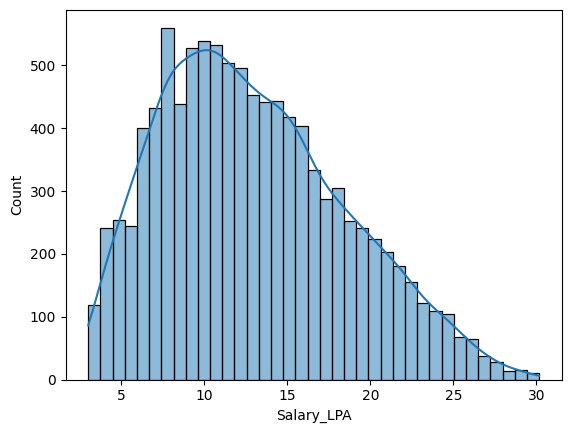

In [10]:
for num in num_data:
    sns.histplot(company_data[num],kde=True)
    plt.show()

In [11]:
import numpy as np
company_data["Salary_LPA"]=np.sqrt(company_data["Salary_LPA"])

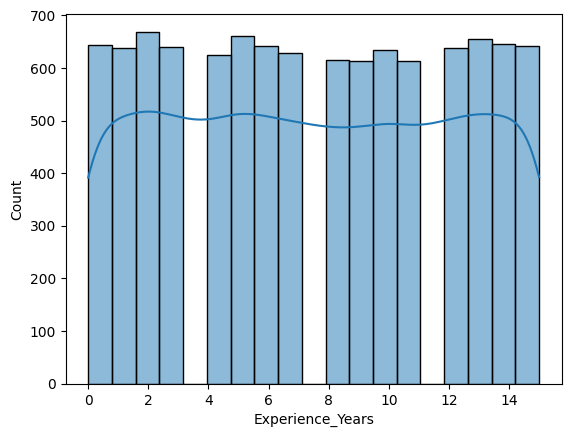

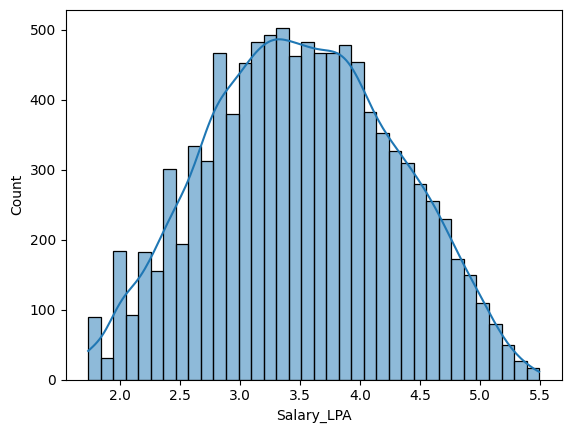

In [12]:
for num in num_data:
    sns.histplot(company_data[num],kde=True)
    plt.show()

##### 3.3.2 Categorical data distribution:


Percentage distribution of Job_Role
Job_Role
BI Developer                     2.970588
ML Engineer                      2.941176
Solutions Architect              2.931373
Network Engineer                 2.901961
Research Scientist               2.892157
QA Engineer                      2.872549
Cyber Security Analyst           2.862745
Computer Vision Engineer         2.862745
AI Engineer                      2.843137
Business Intelligence Analyst    2.803922
Business Analyst                 2.794118
Statistician                     2.794118
Mobile App Developer             2.784314
Data Engineer                    2.754902
Backend Developer                2.754902
DevOps Engineer                  2.745098
HR Manager                       2.735294
Marketing Manager                2.715686
NLP Engineer                     2.686275
Project Manager                  2.676471
Frontend Developer               2.676471
Operations Manager               2.656863
Cloud Engineer                

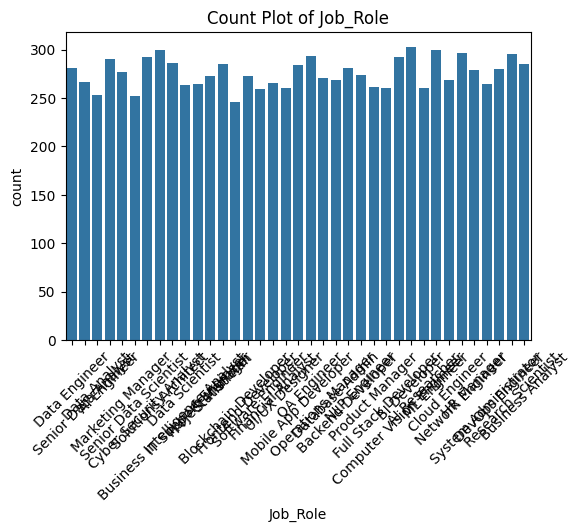


Percentage distribution of Location
Location
Chennai      14.921569
Bangalore    14.558824
Hyderabad    14.509804
Kolkata      14.245098
Delhi        13.950980
Mumbai       13.931373
Pune         13.882353
Name: proportion, dtype: float64


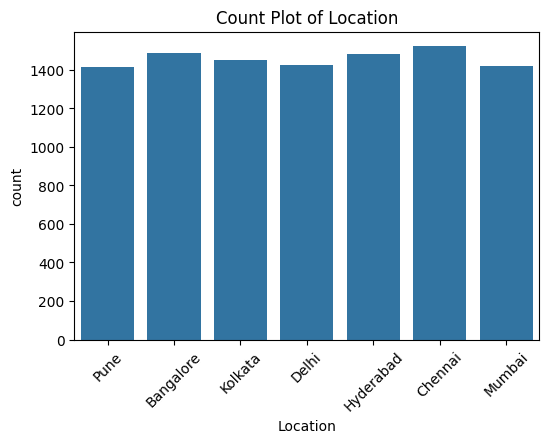


Percentage distribution of Industry
Industry
Manufacturing    17.392157
Finance          16.794118
E-commerce       16.647059
Education        16.509804
IT               16.372549
Healthcare       16.284314
Name: proportion, dtype: float64


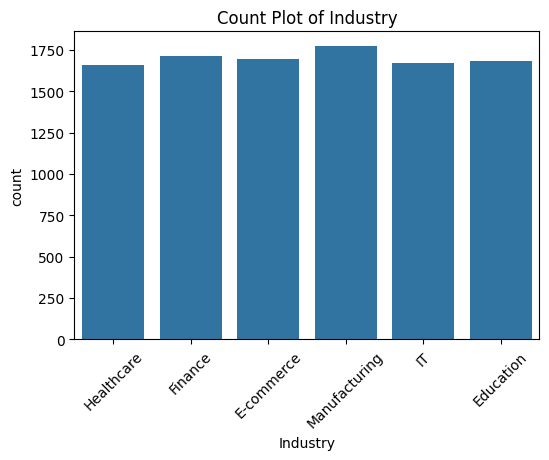


Percentage distribution of Skills
Skills
Excel,Azure                                   0.225490
Tableau,Deep Learning                         0.215686
Excel,Java                                    0.205882
Deep Learning,TensorFlow                      0.196078
PyTorch,Java                                  0.196078
                                                ...   
PyTorch,Azure,TensorFlow,GCP                  0.009804
Azure,C++,Excel                               0.009804
PyTorch,Machine Learning,Python,Kubernetes    0.009804
Java,TensorFlow,Tableau                       0.009804
Kubernetes,Azure,R,C++                        0.009804
Name: proportion, Length: 5880, dtype: float64


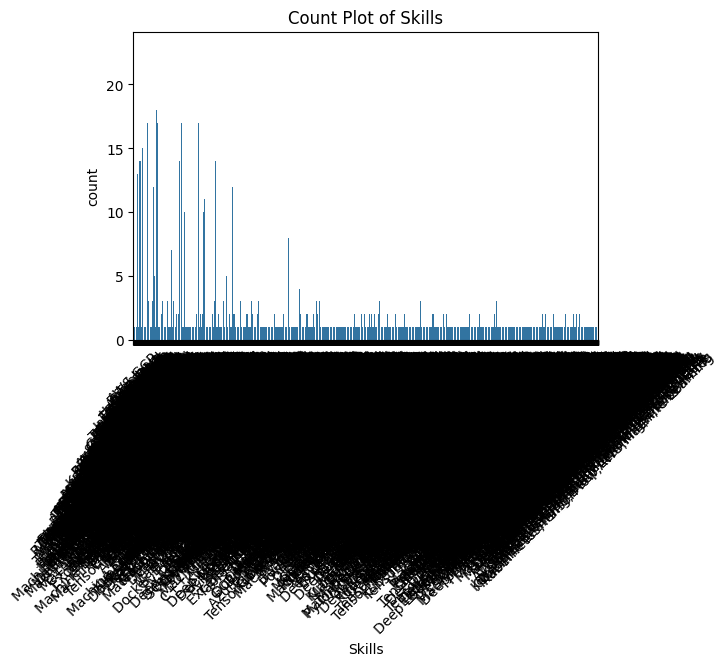


Percentage distribution of Education
Education
M.Tech    16.833333
PhD       16.823529
B.Sc      16.725490
MBA       16.598039
B.Tech    16.549020
M.Sc      16.470588
Name: proportion, dtype: float64


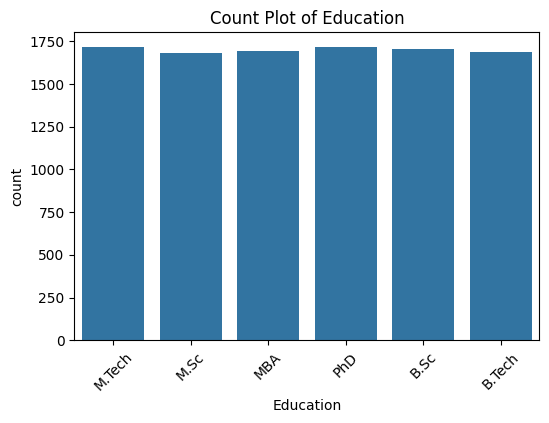


Percentage distribution of Company_Size
Company_Size
Large      25.313725
Startup    25.147059
Small      24.862745
Medium     24.676471
Name: proportion, dtype: float64


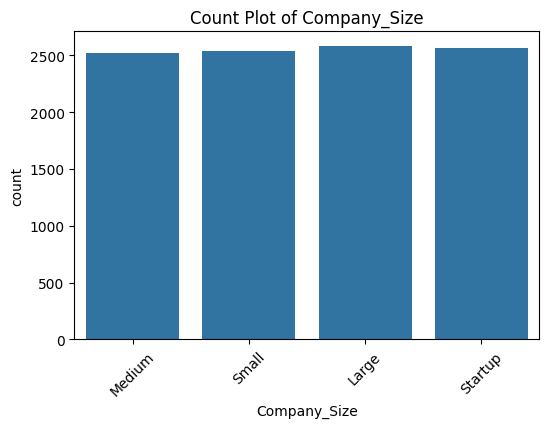

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for cat in cat_data:
    plt.figure(figsize=(6,4))
    sns.countplot(x=company_data[cat])
    
    print(f"\nPercentage distribution of {cat}")
    print(company_data[cat].value_counts(normalize=True)*100)
    
    plt.title(f"Count Plot of {cat}")
    plt.xticks(rotation=45)
    plt.show()


##### 3.4 Data outlier:

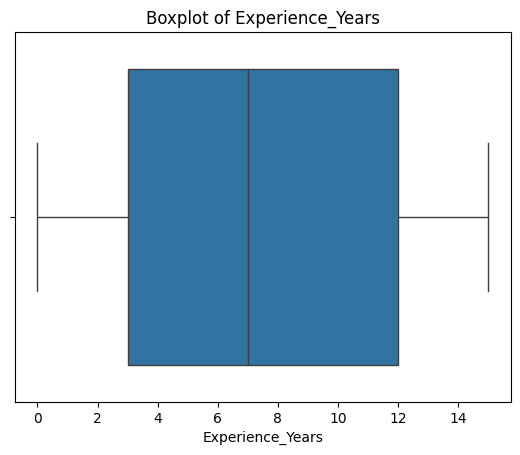

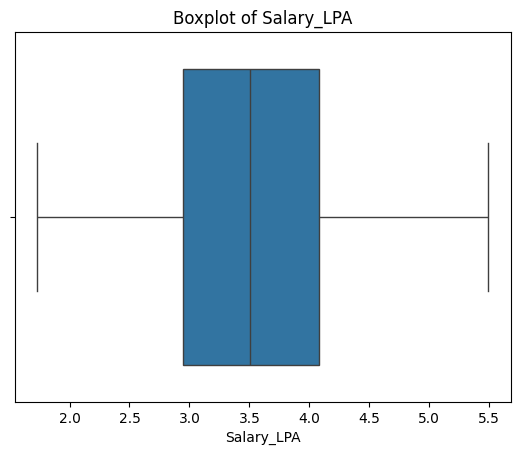

In [14]:
for num in num_data:
    sns.boxplot(x=company_data[num])
    plt.title(f"Boxplot of {num}")
    plt.show()


##### 4.Data preprocessing:

In [15]:
for col in cat_data:
    print(f"\nUnique values in {col}:")
    print(company_data[col].unique())



Unique values in Job_Role:
['Data Engineer' 'Senior Data Analyst' 'Data Analyst' 'AI Engineer'
 'Marketing Manager' 'Senior Data Scientist' 'Cyber Security Analyst'
 'Solutions Architect' 'Business Intelligence Analyst' 'Data Scientist'
 'IT Support Engineer' 'Project Manager' 'Statistician'
 'Blockchain Developer' 'Frontend Developer' 'Software Engineer'
 'Financial Analyst' 'UI/UX Designer' 'Mobile App Developer' 'QA Engineer'
 'Operations Manager' 'Database Admin' 'Backend Developer' 'NLP Engineer'
 'Product Manager' 'Full Stack Developer' 'Computer Vision Engineer'
 'BI Developer' 'AI Researcher' 'ML Engineer' 'Cloud Engineer'
 'Network Engineer' 'HR Manager' 'System Administrator' 'DevOps Engineer'
 'Research Scientist' 'Business Analyst']

Unique values in Location:
['Pune' 'Bangalore' 'Kolkata' 'Delhi' 'Hyderabad' 'Chennai' 'Mumbai']

Unique values in Industry:
['Healthcare' 'Finance' 'E-commerce' 'Manufacturing' 'IT' 'Education']

Unique values in Skills:
['Tableau,Power BI' '

In [16]:
import joblib

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
company_data["Education"] = le.fit_transform(company_data["Education"])

joblib.dump(le, "education_encoder.pkl")


['education_encoder.pkl']

In [17]:
company_data.head(5)

,Job_Role,Experience_Years,Location,Industry,Skills,Education,Company_Size,Salary_LPA
0,Data Engineer,0,Pune,Healthcare,"Tableau,Power BI",3,Medium,2.645751
1,Senior Data Analyst,2,Bangalore,Finance,"Excel,C++,Tableau,AWS",2,Small,2.925748
2,Data Analyst,5,Pune,E-commerce,"Excel,Docker",4,Large,2.441311
3,AI Engineer,11,Kolkata,Healthcare,"R,Tableau",2,Large,3.517101
4,Marketing Manager,11,Delhi,Finance,"AWS,GCP",5,Small,4.232021


In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

company_data["Skills"] = company_data["Skills"].str.split(",")

mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(company_data["Skills"])

skills_df = pd.DataFrame(
    skills_encoded,
    columns=mlb.classes_,
    index=company_data.index
)

company_data = pd.concat([company_data, skills_df], axis=1)
company_data.drop("Skills", axis=1, inplace=True)

joblib.dump(mlb, "skills_mlb.pkl")

['skills_mlb.pkl']

In [19]:
company_data = pd.get_dummies(
    company_data,
    columns=["Job_Role","Location","Industry","Company_Size"],
    drop_first=True,
    dtype=int
)

In [20]:
X = company_data.drop("Salary_LPA", axis=1)
y = company_data["Salary_LPA"]

In [21]:
joblib.dump(X.columns, "model_columns.pkl")

['model_columns.pkl']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model training completed successfully.\n")

print("Model Evaluation Results:")
print(f"R2 Score  : {round(r2,4)}")
print(f"MAE       : {round(mae,4)}")
print(f"RMSE      : {round(rmse,4)}")

Model training completed successfully.

Model Evaluation Results:
R2 Score  : 0.7151
MAE       : 0.3523
RMSE      : 0.4279


In [25]:
joblib.dump(model, "salary_model.pkl")

['salary_model.pkl']